DATA UNDERSTANDING STAGE

In [2]:
# Step 1: Initial Data Loading

# Import necessary libraries
import pandas as pd
# Justification: 
# The pandas library is essential for data manipulation and analysis. 
# It provides powerful data structures like DataFrames that are ideal for handling tabular data.

# Define the path to the CSV file
file_path = '../data/SemiconductorShortage.csv'
# Justification:
# Specifying the file path is crucial to correctly locate the dataset for loading.
# The relative path is used here assuming the script is run from a directory 
# where 'data' is a subdirectory containing the 'SemiconductorShortage.csv' file.

# Load the dataset into a pandas DataFrame
semiconductor_data = pd.read_csv(file_path)
# Justification:
# The pd.read_csv function is used to read the data from a CSV file into a pandas DataFrame.
# This method is efficient and allows for quick data loading, enabling further data exploration and manipulation.

# Display the first few rows of the DataFrame to verify the data is loaded correctly
semiconductor_data.head()
# Justification:
# The .head() function is used here to display the first few rows of the DataFrame.
# This step is crucial for initial data verification, ensuring that the data has been loaded correctly 
# and that the expected structure (columns and sample data) is present.


,DATE,Producer Price Index(By Industry in $),Export Price Index(End Use of semiconductors),Import Price Index(in $ End Use of semiconductors),No. of employed peoples in semiconductor industry,Export Price Index (End use excluding without semiconductors),Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE),"Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors","Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equipment, and Semiconductors"
0,01-01-1985,100.5,.,.,670.8,.,5.5335,.,NaN,81.4300
1,01-02-1985,100.8,.,.,665.6,.,5.3861,.,NaN,81.4319
2,01-03-1985,100.9,169,141.6,660.9,223.9,5.3103,69.2,NaN,82.1699
3,01-04-1985,100.6,.,.,653.9,.,5.1255,.,NaN,81.9731
4,01-05-1985,100.1,.,.,647.2,.,5.0821,.,NaN,82.1311


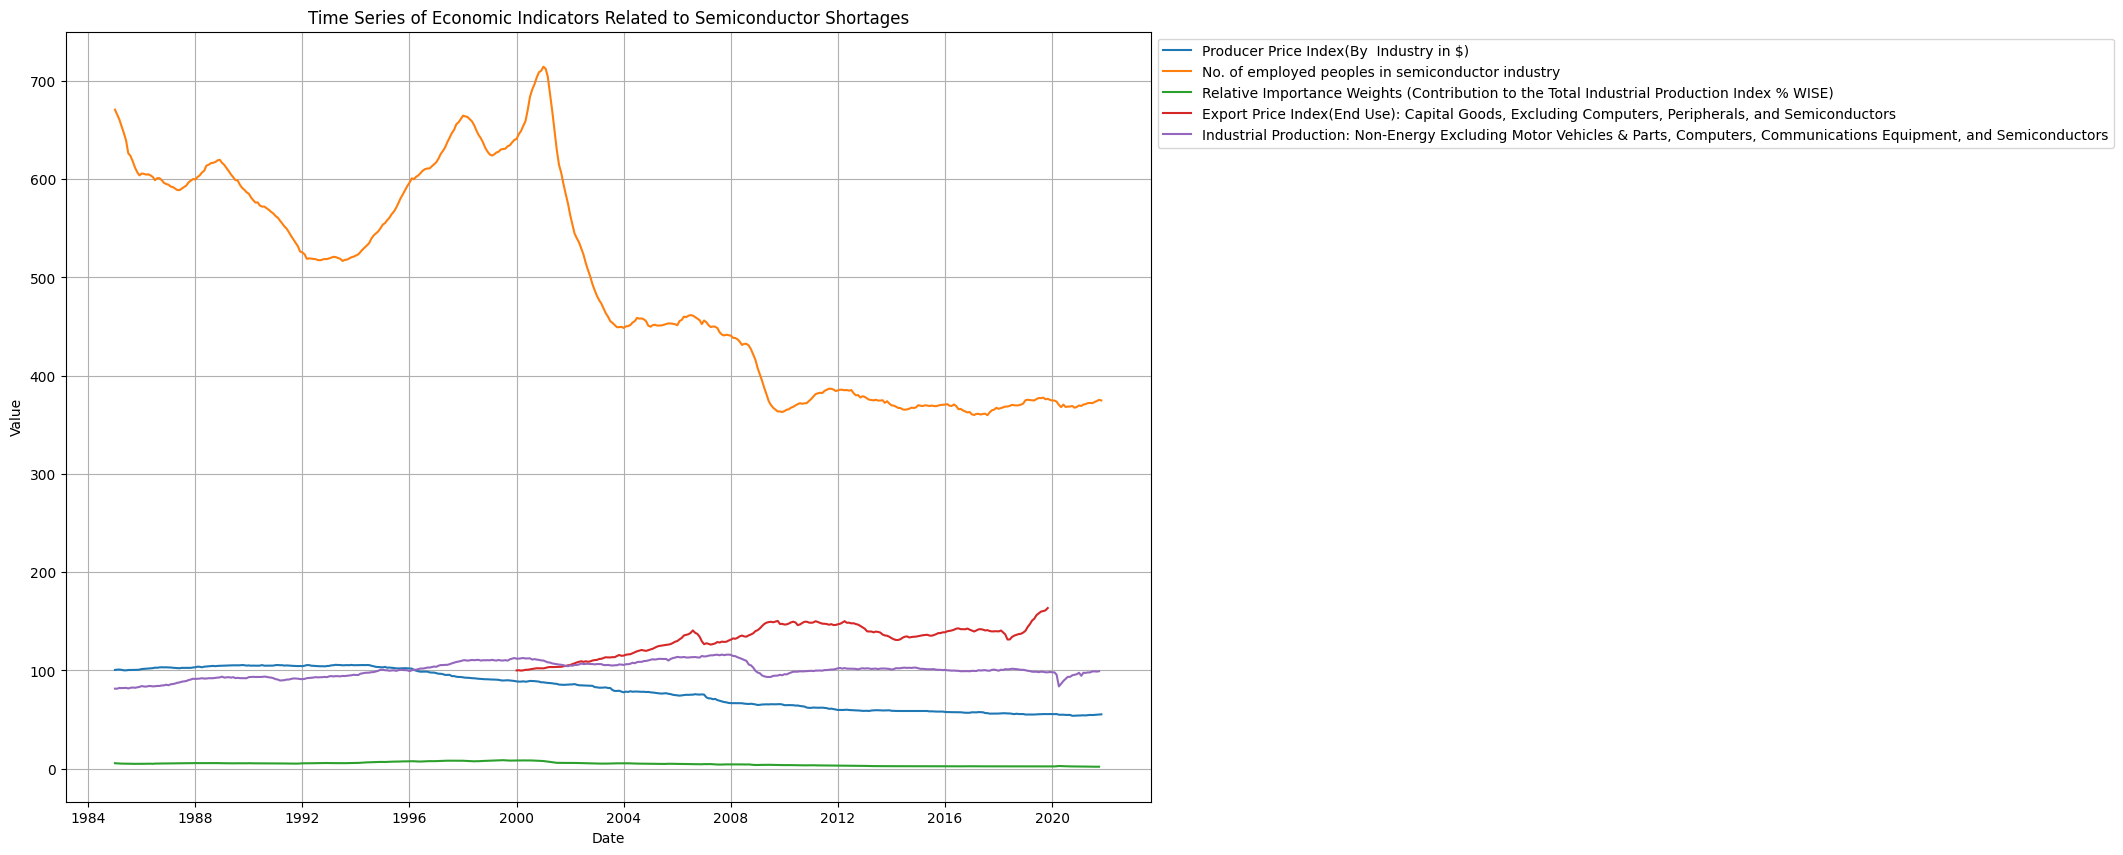

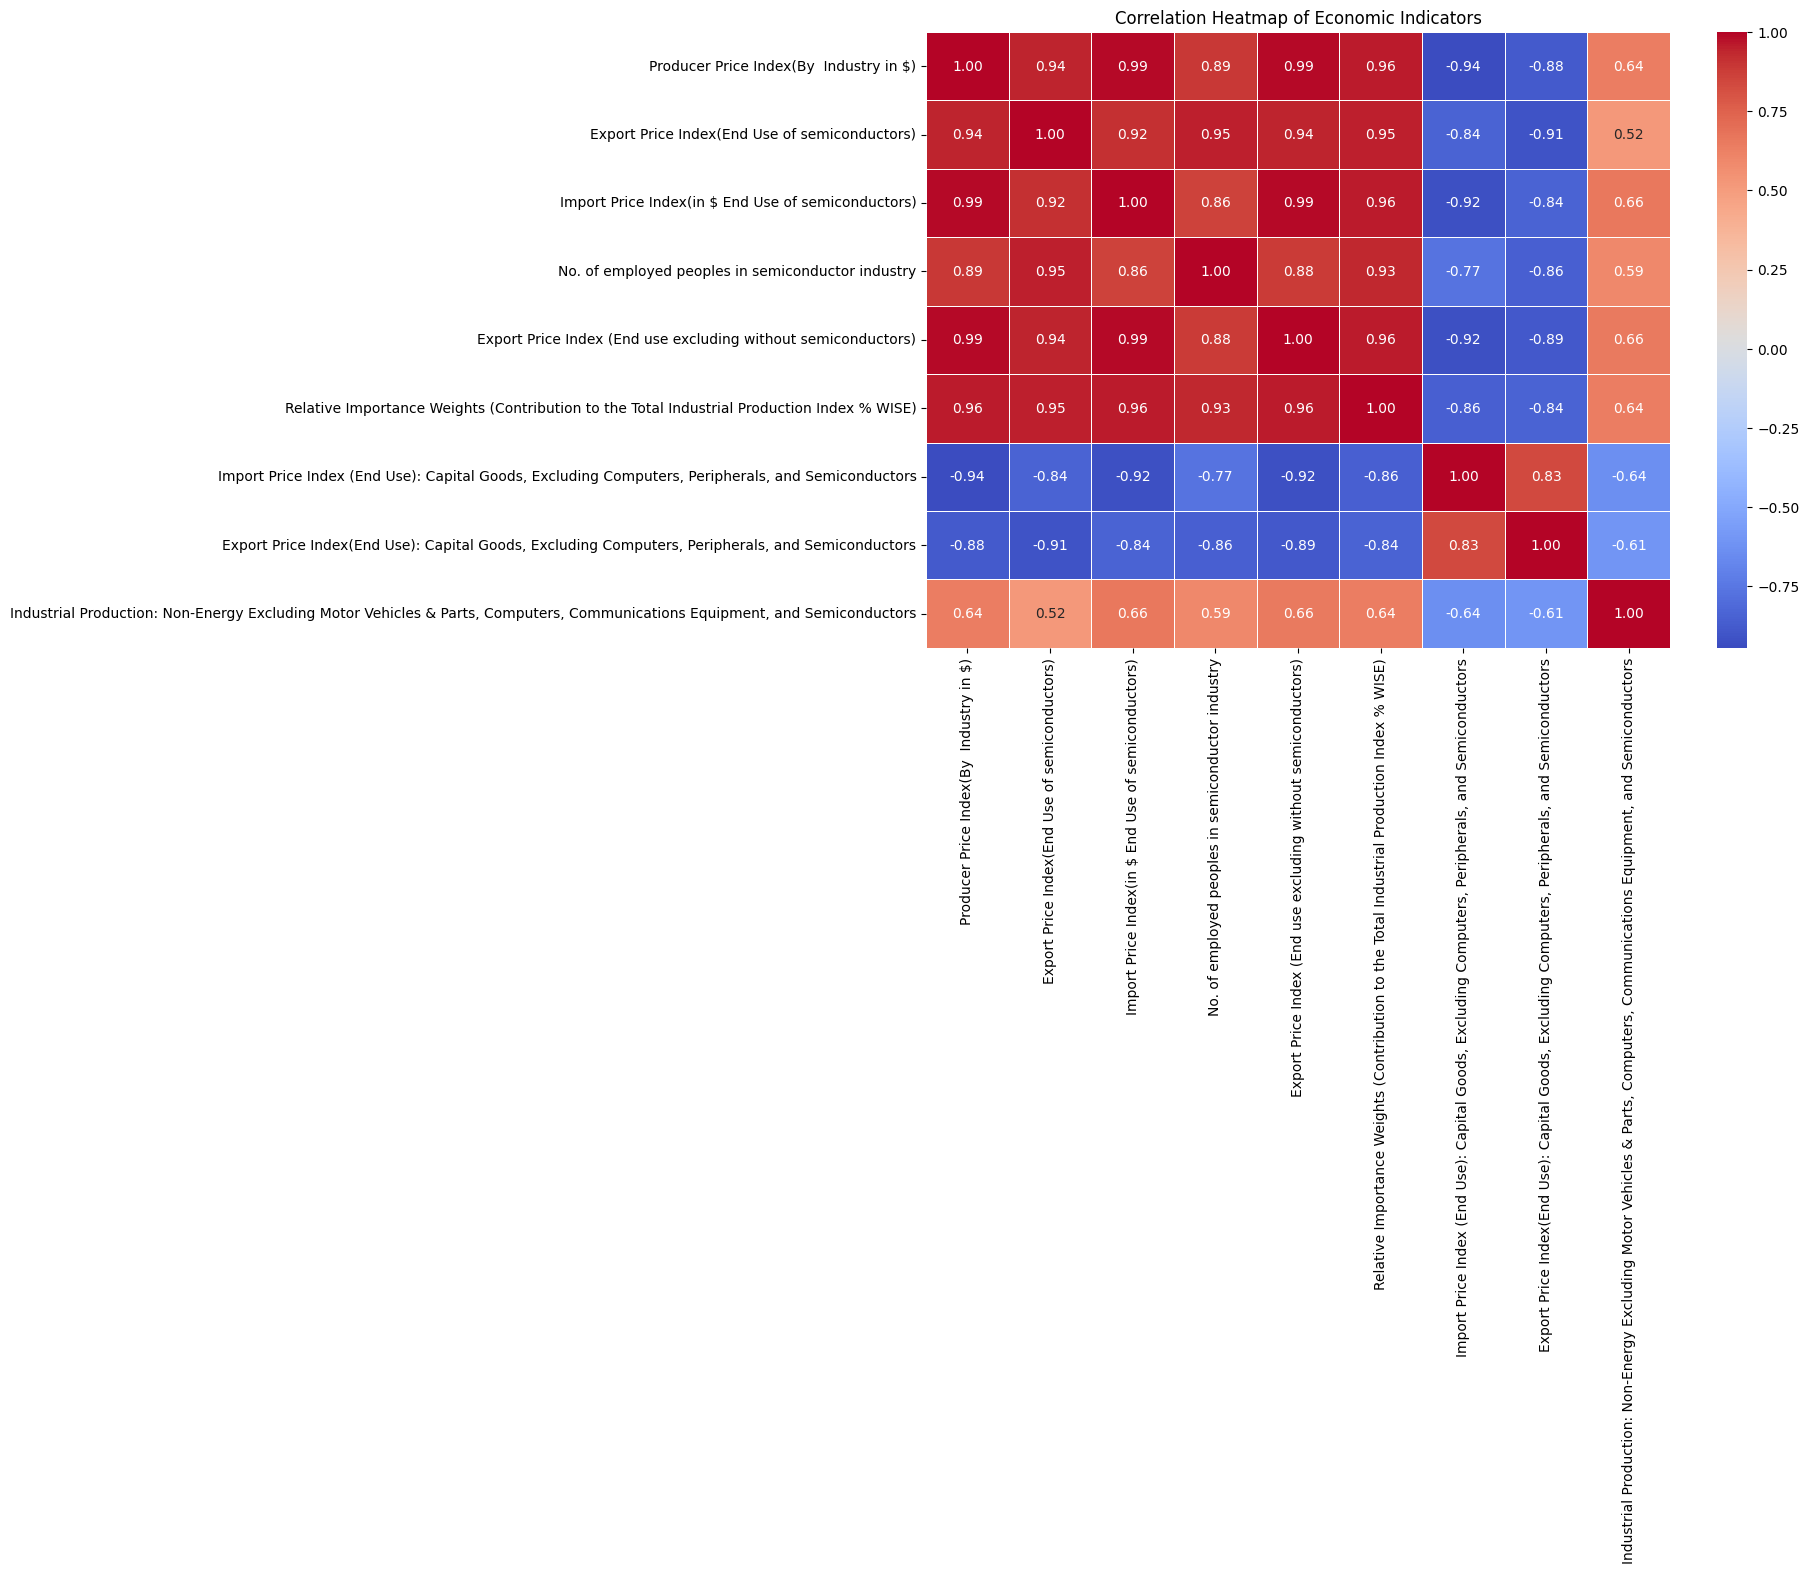

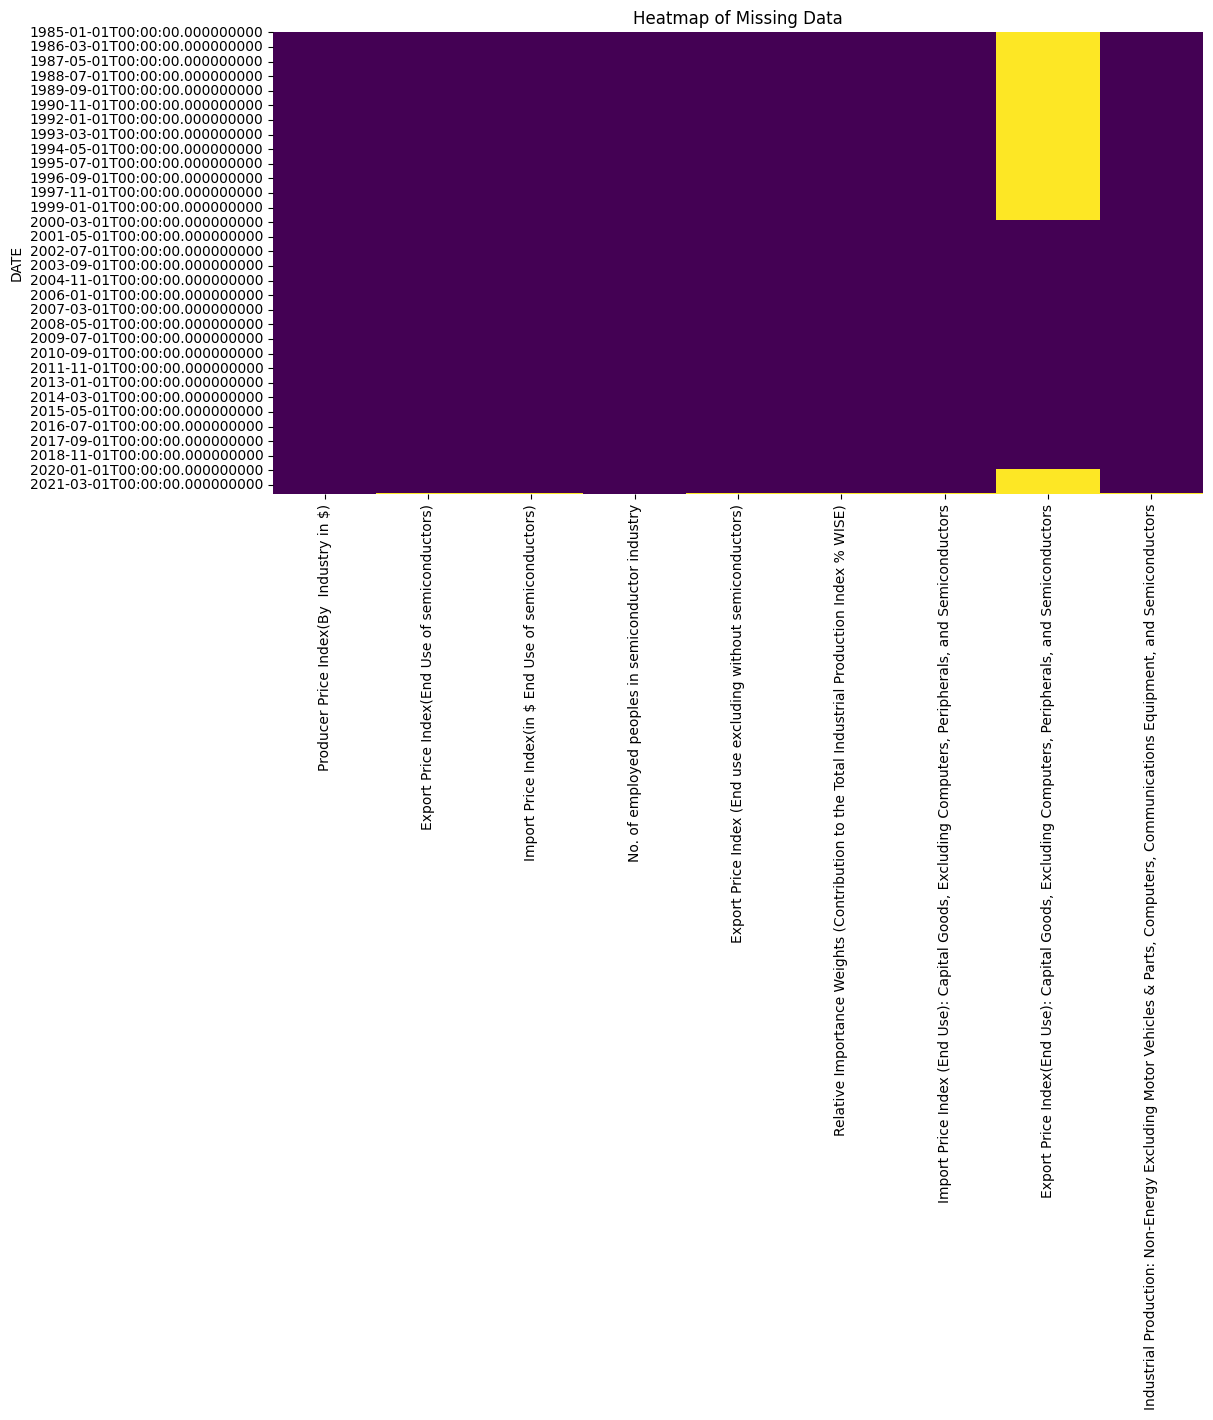

In [5]:
# Step 2: Data Exploration

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Justification:
# The pandas library is used for data manipulation and handling.
# Matplotlib and Seaborn are used for data visualization. 
# Matplotlib provides low-level control over plots, while Seaborn offers high-level abstractions for statistical plotting, enhancing the readability of the visual outputs.

# Convert 'DATE' column to datetime format
semiconductor_data['DATE'] = pd.to_datetime(semiconductor_data['DATE'], format='%d-%m-%Y')
# Justification:
# Converting the 'DATE' column to a datetime format is crucial for time-series analysis.
# This conversion allows for proper indexing and manipulation of dates, making it easier to perform operations like resampling, rolling statistics, and time-based indexing.

# Set 'DATE' as the index for easier time-series plotting
semiconductor_data.set_index('DATE', inplace=True)
# Justification:
# Setting 'DATE' as the index optimizes the DataFrame for time-series analysis.
# With 'DATE' as the index, time-series operations (e.g., slicing, resampling) become more intuitive and efficient, aligning with the objective of investigating trends over time.

# 1. Time Series Plots for Key Indicators
plt.figure(figsize=(14, 10))
# Justification:
# Creating a figure with specified dimensions ensures that the plots are large enough for detailed analysis and presentation.

for column in semiconductor_data.columns:
    if semiconductor_data[column].dtype != 'object':  # Ensure only numerical columns are plotted
        plt.plot(semiconductor_data.index, semiconductor_data[column], label=column)
# Justification:
# Looping through each column ensures that all key economic indicators are plotted.
# Filtering out non-numeric columns ensures that only relevant data (i.e., numeric indicators) are visualized, avoiding potential plotting errors and making the plot more informative.

plt.title('Time Series of Economic Indicators Related to Semiconductor Shortages')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()
# Justification:
# The plot title, axis labels, and legend enhance the interpretability of the plot by clearly communicating what is being visualized.
# The grid is added for better readability, especially when analyzing trends over time.

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Dropping rows with NaN values to calculate correlation correctly
correlation_matrix = semiconductor_data.dropna().corr()
# Justification:
# A correlation matrix is essential for identifying relationships between the different economic indicators.
# Dropping NaN values before computing correlations ensures the accuracy of the correlation coefficients, as missing data can distort the results.

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Economic Indicators')
plt.show()
# Justification:
# The heatmap provides a visual summary of the correlation matrix, with annotations for precise values.
# The color palette (coolwarm) is chosen for clear differentiation between positive and negative correlations.
# This helps in identifying which indicators are most closely related, guiding further analysis or model building.

# 3. Missing Data Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(semiconductor_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()
# Justification:
# Visualizing missing data helps to quickly identify gaps in the dataset.
# Understanding where data is missing is crucial for making decisions about data imputation, deletion, or other preprocessing steps.
# The 'viridis' colormap is chosen for its perceptual uniformity, making the heatmap accessible to individuals with color vision deficiencies.


DATA PREPARATION STAGE  

In [7]:
# Step 3: Handle Missing Data

# Import necessary libraries
import pandas as pd

# Justification:
# Pandas is used here to manage and manipulate data, particularly focusing on handling missing values.
# Handling missing data is a critical step to ensure the dataset's integrity before proceeding with modeling.

# Let's review the missing data again to decide on the handling strategy
print("Missing Data Summary:")
print(semiconductor_data.isnull().sum())
# Justification:
# Printing a summary of missing data helps identify which columns have missing values and the extent of those missing values.
# This summary guides the decision-making process for how to handle the missing data, ensuring that the chosen imputation method is appropriate for the characteristics of the dataset.

# Imputation strategy: Filling missing values with the median for numerical columns
# We use median as it's less sensitive to outliers compared to mean
for column in semiconductor_data.columns:
    if semiconductor_data[column].dtype != 'object':  # Only apply to numerical columns
        semiconductor_data[column] = semiconductor_data[column].fillna(semiconductor_data[column].median())
# Justification:
# Missing values are filled with the median because it is robust to outliers, which can skew the mean.
# This approach ensures that the imputation process does not introduce bias into the dataset, particularly for time-series data where trends are critical.

# After filling missing values, let's check again
print("\nMissing Data After Imputation:")
print(semiconductor_data.isnull().sum())
# Justification:
# After performing the imputation, it's essential to verify that all missing values have been addressed.
# This step ensures that the dataset is now complete and ready for further processing, such as feature engineering or modeling.

# Save the cleaned dataset to the Outputs_SemiconductorShortage folder
output_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep1.csv'
semiconductor_data.to_csv(output_path, index=True)
# Justification:
# Saving the cleaned dataset is a crucial step for maintaining a clear workflow and version control.
# The cleaned dataset can be used as an input for subsequent steps (e.g., feature engineering, modeling) without needing to reapply the missing data handling process.

print(f"Cleaned dataset saved to {output_path}")
# Justification:
# Providing a confirmation message that the cleaned dataset has been saved helps in tracking the progress and ensures that the file has been correctly written to the specified location.


Missing Data Summary:
Producer Price Index(By  Industry in $)                                                                                        0
Export Price Index(End Use of semiconductors)                                                                                  1
Import Price Index(in $ End Use of semiconductors)                                                                             1
No. of employed peoples in semiconductor industry                                                                              0
Export Price Index (End use excluding without semiconductors)                                                                  1
Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)                                     0
Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors                              1
Export Price Index(End Use): Capital Goods, Excluding Computers, Peripheral

In [11]:
# Step 4: Final Handling of Remaining Missing Data

# Import necessary libraries
import pandas as pd
import numpy as np

# Justification:
# Pandas is used for data manipulation, and NumPy is used for numerical operations.
# This step focuses on cleaning the remaining problematic data columns, particularly those that might still contain non-numeric characters or missing values.

# Inspect problematic columns before cleaning
print("Sample Data Before Cleaning:")
print(semiconductor_data[['Export Price Index(End Use of semiconductors)',
                          'Import Price Index(in $ End Use of semiconductors)',
                          'Export Price Index (End use excluding without semiconductors)',
                          'Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors']].head(10))
# Justification:
# Reviewing a sample of the data before cleaning helps identify the nature of the remaining issues.
# Specifically, it allows us to see non-numeric characters (like dollar signs or commas) that need to be removed before further processing.
# This inspection step is crucial for understanding the exact transformations needed to clean the data.

# Remove non-numeric characters (e.g., commas, dollar signs) and convert to numeric
for column in ['Export Price Index(End Use of semiconductors)',
               'Import Price Index(in $ End Use of semiconductors)',
               'Export Price Index (End use excluding without semiconductors)',
               'Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors']:
    
    semiconductor_data[column] = semiconductor_data[column].replace(r'[\$,]', '', regex=True).astype(float)
# Justification:
# Non-numeric characters can interfere with numerical analysis and must be removed.
# Using regular expressions (`regex=True`) to replace these characters ensures that the columns are clean and can be safely converted to floats.
# Converting the cleaned columns to `float` type makes them suitable for numerical operations such as statistical analysis, modeling, and imputation.

# Reapply forward fill and backward fill after cleaning
semiconductor_data['Export Price Index(End Use of semiconductors)'] = semiconductor_data['Export Price Index(End Use of semiconductors)'].ffill().bfill()
semiconductor_data['Import Price Index(in $ End Use of semiconductors)'] = semiconductor_data['Import Price Index(in $ End Use of semiconductors)'].ffill().bfill()
semiconductor_data['Export Price Index (End use excluding without semiconductors)'] = semiconductor_data['Export Price Index (End use excluding without semiconductors)'].ffill().bfill()
semiconductor_data['Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors'] = semiconductor_data['Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors'].ffill().bfill()
# Justification:
# Forward fill (`ffill`) and backward fill (`bfill`) methods are reapplied to ensure that any remaining missing values are appropriately filled after cleaning.
# These methods are effective for time-series data where the assumption is that the previous or next available value is a reasonable estimate for the missing value.
# This step ensures that all numeric columns are complete and ready for analysis or modeling.

# After filling missing values, let's check again
print("\nMissing Data After Final Imputation:")
print(semiconductor_data.isnull().sum())
# Justification:
# Verifying the dataset after the final imputation step ensures that all missing values have been addressed.
# This check confirms that the data is now fully prepared for subsequent analysis stages, such as feature engineering or modeling.

# Save the cleaned dataset to the Outputs_SemiconductorShortage folder
output_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep2.csv'
semiconductor_data.to_csv(output_path, index=True)
# Justification:
# Saving the fully cleaned dataset is important for maintaining a reproducible workflow.
# By saving at this stage, we create a checkpoint that can be used in future steps without needing to repeat the cleaning process.

print(f"Re-cleaned dataset saved to {output_path}")
# Justification:
# Providing feedback that the cleaned dataset has been saved helps in tracking progress and ensures that the cleaned data is securely stored.


Sample Data Before Cleaning:
            Export Price Index(End Use of semiconductors)  \
DATE                                                        
1985-01-01                                            NaN   
1985-02-01                                            NaN   
1985-03-01                                          169.0   
1985-04-01                                          169.0   
1985-05-01                                          169.0   
1985-06-01                                          169.6   
1985-07-01                                          169.6   
1985-08-01                                          169.6   
1985-09-01                                          163.8   
1985-10-01                                          163.8   

            Import Price Index(in $ End Use of semiconductors)  \
DATE                                                             
1985-01-01                                              141.6    
1985-02-01                              

In [12]:
# Step 5: Feature Engineering

# Import necessary libraries
import pandas as pd

# Justification:
# Pandas is used here for loading and manipulating the dataset. Feature engineering is crucial for enhancing the predictive power of models by creating relevant features that capture important patterns in the data.

# Load the dataset from the previous checkpoint (Prep2)
input_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep2.csv'
semiconductor_data = pd.read_csv(input_path, index_col='DATE', parse_dates=True)
# Justification:
# The dataset from the previous cleaning step (Prep2) is loaded for further processing.
# Using 'DATE' as the index and parsing it as a datetime object is essential for time-series analysis, as it allows us to create time-based features like lags and rolling statistics.

# 1. Lag Features
# Create lag features for a selected list of columns
lag_features = ['Producer Price Index(By  Industry in $)', 
                'Export Price Index(End Use of semiconductors)', 
                'Import Price Index(in $ End Use of semiconductors)']
# Justification:
# Lag features are created to capture the impact of past values on the current state of these economic indicators.
# This is particularly useful in time-series forecasting, where the value of a metric in previous months can be a strong predictor of future values.

# Generate lag features for the last 3 months
for feature in lag_features:
    semiconductor_data[f'{feature}_lag1'] = semiconductor_data[feature].shift(1)
    semiconductor_data[f'{feature}_lag2'] = semiconductor_data[feature].shift(2)
    semiconductor_data[f'{feature}_lag3'] = semiconductor_data[feature].shift(3)
# Justification:
# Shifting the data by 1, 2, and 3 months creates lag features that represent the values of these indicators in the previous months.
# This helps in capturing temporal dependencies in the data, which are vital for accurate forecasting.

# 2. Rolling Window Statistics
# Create rolling mean and standard deviation for the last 3 months
for feature in lag_features:
    semiconductor_data[f'{feature}_rolling_mean_3'] = semiconductor_data[feature].rolling(window=3).mean()
    semiconductor_data[f'{feature}_rolling_std_3'] = semiconductor_data[feature].rolling(window=3).std()
# Justification:
# Rolling window statistics (mean and standard deviation) are calculated to capture the trends and volatility in the data over the recent past (last 3 months).
# The rolling mean smooths out short-term fluctuations and highlights longer-term trends, while the rolling standard deviation provides a measure of the variability or volatility in the data.
# These features are particularly useful for understanding the stability and predictability of the indicators over time.

# 3. Date-time Features
# Extract year, month, and quarter from the 'DATE' index
semiconductor_data['Year'] = semiconductor_data.index.year
semiconductor_data['Month'] = semiconductor_data.index.month
semiconductor_data['Quarter'] = semiconductor_data.index.quarter
# Justification:
# Extracting date-related features such as year, month, and quarter is essential for capturing seasonal and cyclical patterns in the data.
# These features help in identifying trends that are specific to certain periods (e.g., seasonal trends, quarterly business cycles) and can improve the accuracy of forecasting models.

# After creating the new features, let's review the dataset
print("Feature-engineered dataset:")
print(semiconductor_data.head())
# Justification:
# Reviewing the dataset after feature engineering allows us to verify that the new features have been correctly created and are logically consistent with the original data.
# This step is crucial to ensure that no errors were introduced during the feature engineering process.

# Save the feature-engineered dataset as Prep3
output_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep3.csv'
semiconductor_data.to_csv(output_path, index=True)
# Justification:
# Saving the feature-engineered dataset as Prep3 creates a new checkpoint in the workflow.
# This allows for easy retrieval of the dataset in its current state for subsequent analysis, modeling, or further feature engineering.
# Maintaining a versioned and structured data pipeline is essential for reproducibility and managing complex data workflows.

print(f"Feature-engineered dataset saved to {output_path}")
# Justification:
# Providing feedback that the dataset has been saved ensures that the process is complete and helps in tracking progress within the workflow.


Feature-engineered dataset:
            Producer Price Index(By  Industry in $)  \
DATE                                                  
1985-01-01                                    100.5   
1985-02-01                                    100.8   
1985-03-01                                    100.9   
1985-04-01                                    100.6   
1985-05-01                                    100.1   

            Export Price Index(End Use of semiconductors)  \
DATE                                                        
1985-01-01                                          169.0   
1985-02-01                                          169.0   
1985-03-01                                          169.0   
1985-04-01                                          169.0   
1985-05-01                                          169.0   

            Import Price Index(in $ End Use of semiconductors)  \
DATE                                                             
1985-01-01                

DATA MODELING STAGE

16:57:20 - cmdstanpy - INFO - Chain [1] start processing
16:57:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain t

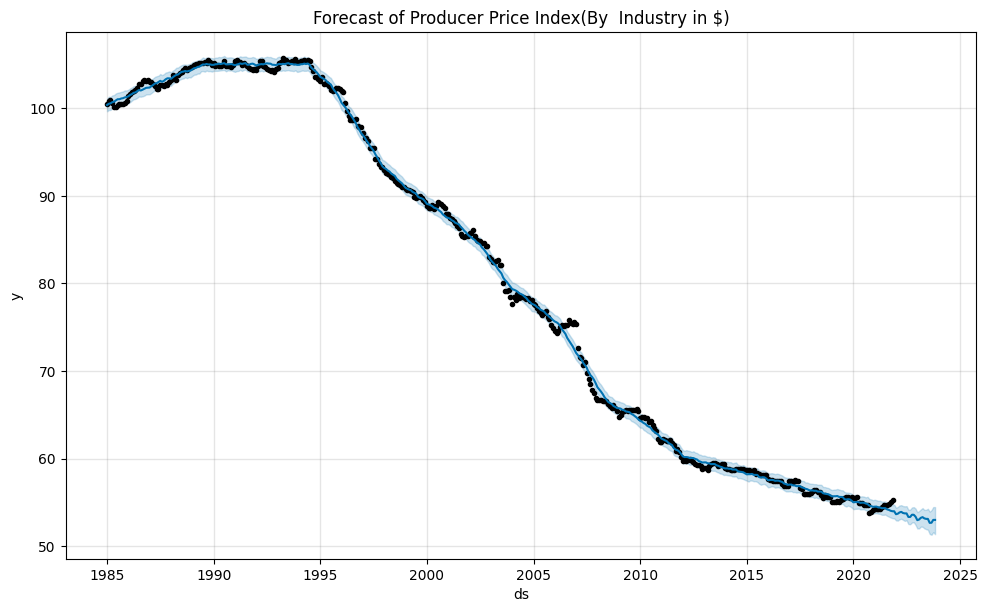

16:57:20 - cmdstanpy - INFO - Chain [1] start processing
16:57:20 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain t

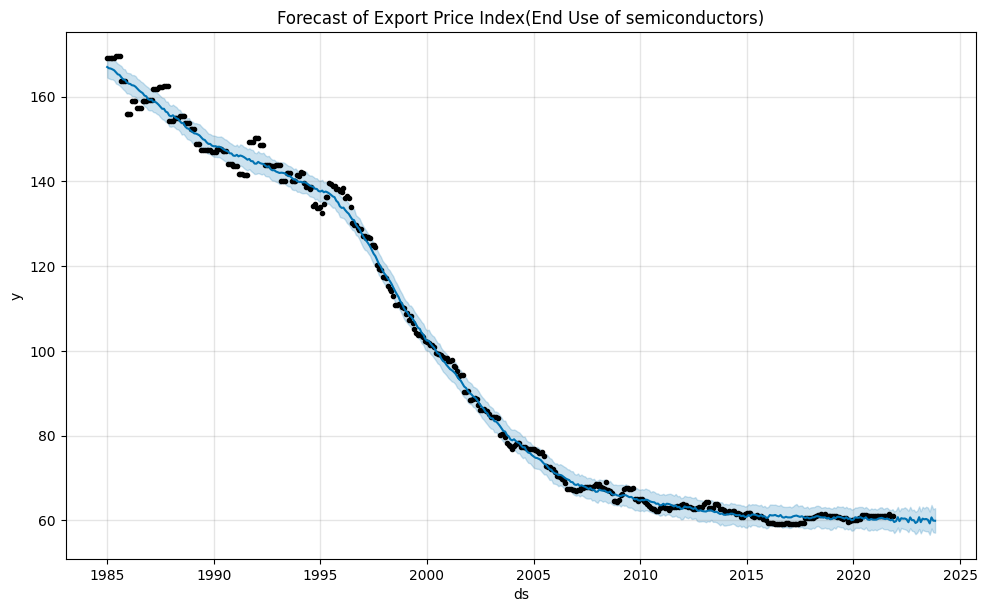

16:57:21 - cmdstanpy - INFO - Chain [1] start processing
16:57:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain t

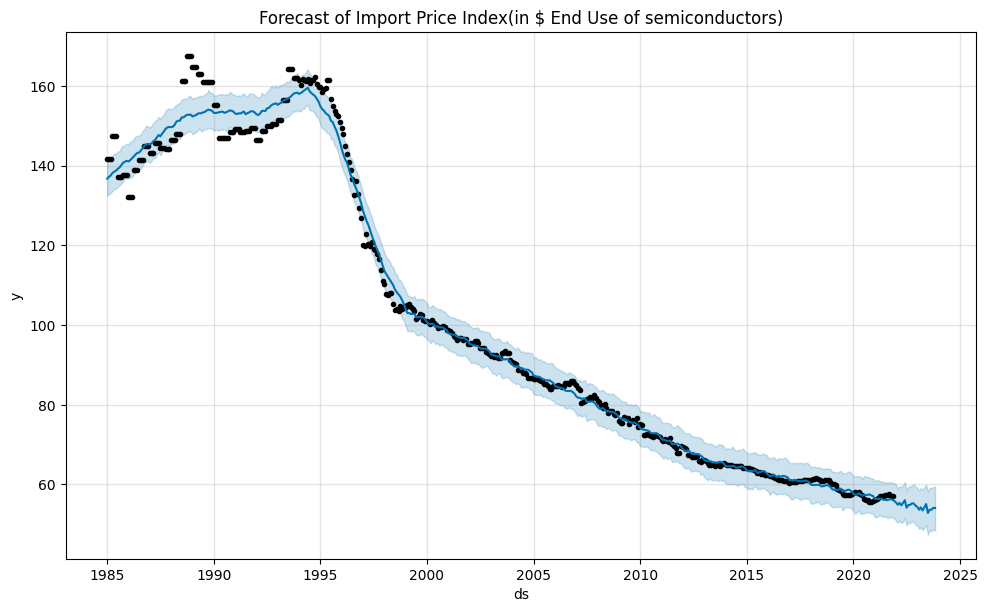

16:57:21 - cmdstanpy - INFO - Chain [1] start processing
16:57:21 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\mattj\Desktop\semiconductor_optimization\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain t

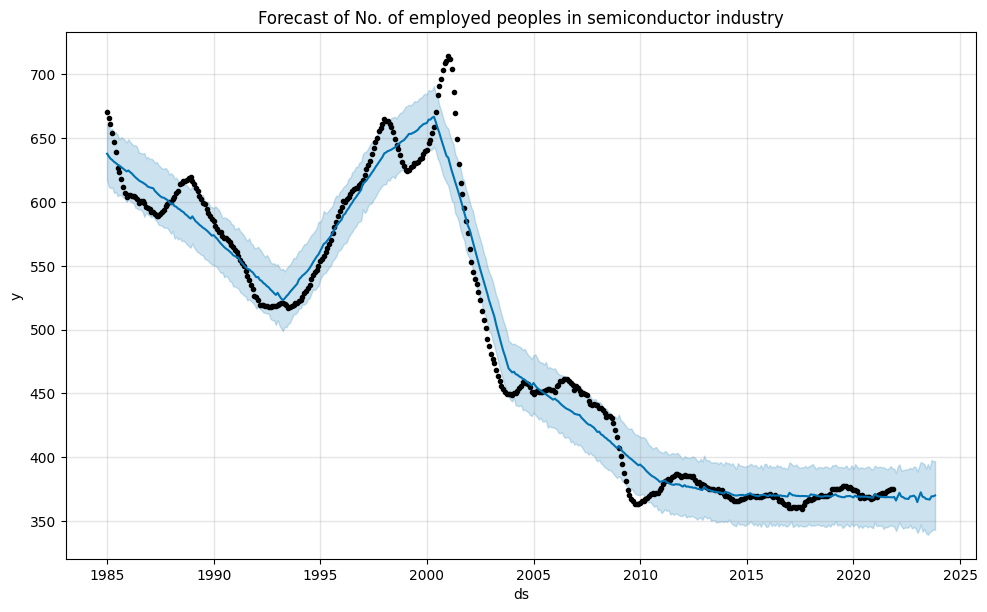

Forecasts saved to ../Outputs_SemiconductorShortage/SemiconductorShortage_Modeling1.csv
Models saved to ../Outputs_SemiconductorShortage/SemiconductorShortage_Model.pkl


In [3]:
# Step 6: Modeling with Prophet for Feature-Engineered Metrics

# Import necessary libraries
from prophet import Prophet
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Justification:
# Prophet is used for time-series forecasting, as it is particularly effective for handling trends and seasonality in data with minimal hyperparameter tuning.
# Pickle is used to save the models for future use, ensuring that the trained models can be easily loaded and used without retraining.
# Pandas handles data manipulation, while Matplotlib is used for plotting the forecast results.

# Load the dataset from the previous checkpoint (Prep3)
input_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep3.csv'
semiconductor_data = pd.read_csv(input_path, index_col='DATE', parse_dates=True)
# Justification:
# The dataset from the feature engineering step (Prep3) is loaded, as it contains the newly created features that are crucial for accurate forecasting.
# Parsing 'DATE' as a datetime object and setting it as the index ensures that the data is ready for time-series modeling.

# List of key metrics to forecast
key_metrics = [
    'Producer Price Index(By  Industry in $)', 
    'Export Price Index(End Use of semiconductors)', 
    'Import Price Index(in $ End Use of semiconductors)',
    'No. of employed peoples in semiconductor industry'
]
# Justification:
# These key metrics are selected because they are directly related to the objective of forecasting economic impacts due to semiconductor shortages.
# Forecasting these indicators will provide valuable insights into future trends that can inform strategic decision-making.

# Dictionary to store models
models = {}
forecasts = {}

# Justification:
# Dictionaries are used to store the trained models and forecasts for each metric, allowing for easy access and organization of the results.

for metric in key_metrics:
    # Prepare the data for Prophet
    df = semiconductor_data[[metric]].reset_index().rename(columns={'DATE': 'ds', metric: 'y'})
    # Justification:
    # Prophet requires the data to be in a specific format with the datetime column labeled as 'ds' and the target variable as 'y'.
    # Resetting the index and renaming columns ensures compatibility with Prophet's API.

    # Initialize and fit the model
    model = Prophet()
    model.fit(df)
    # Justification:
    # Prophet is initialized and fitted to the data. This step trains the model to recognize patterns, trends, and seasonality in the historical data, which will be used to make future predictions.

    # Create a future dataframe
    future = model.make_future_dataframe(periods=24, freq='M')
    # Justification:
    # A future dataframe is created for the next 24 months. The frequency is set to monthly ('M') as the data likely reflects monthly economic indicators.
    # This step prepares the model to generate forecasts for the specified future period.

    # Predict future values
    forecast = model.predict(future)
    # Justification:
    # The trained model is used to predict future values for the specified period. This prediction will provide insights into how the economic indicators might evolve over time.

    # Store the forecast and model
    forecasts[metric] = forecast[['ds', 'yhat']]
    models[metric] = model
    # Justification:
    # Storing the forecasts and models in dictionaries allows for easy retrieval and organization. 
    # The 'yhat' column contains the predicted values, which are essential for analysis and visualization.

    # Plot the forecast
    fig1 = model.plot(forecast)
    plt.title(f'Forecast of {metric}')
    plt.show()
    # Justification:
    # Plotting the forecast helps visualize the predicted trends, making it easier to interpret the model's output.
    # Visualization is a key step in communicating the results to stakeholders, showing how the selected metrics are expected to change over time.

# Combine forecasts into a single DataFrame
forecast_df = pd.DataFrame({'ds': forecasts[key_metrics[0]]['ds']})
for metric in key_metrics:
    forecast_df[metric] = forecasts[metric]['yhat']
# Justification:
# Combining all forecasts into a single DataFrame simplifies further analysis and allows for the comparison of different metrics over the forecasted period.
# This consolidated DataFrame can be easily exported or used for additional evaluations.

# Save the forecasts to a CSV file
output_csv_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Modeling1.csv'
forecast_df.to_csv(output_csv_path, index=False)
print(f"Forecasts saved to {output_csv_path}")
# Justification:
# Saving the forecasts in a CSV file ensures that the results are preserved and can be shared or analyzed further.
# The CSV file serves as a record of the predictions made by the model, allowing for future reference or reporting.

# Save all the models into a single .pkl file
output_model_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Model.pkl'
with open(output_model_path, 'wb') as file:
    pickle.dump(models, file)
print(f"Models saved to {output_model_path}")
# Justification:
# Saving the models using Pickle allows for easy loading and reuse of the trained models without needing to retrain them.
# This is particularly useful for deploying the models in production or for performing further analysis at a later time.


In [11]:
# Step 7: Model Validation

# Import necessary libraries
import pickle
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

# Justification:
# Pickle is used to load the previously saved models, ensuring that we validate the exact models that were trained and saved during the modeling step.
# Pandas is used for data manipulation, specifically for aligning the actual data with the forecasts generated by the models.
# Numpy is used for numerical operations, and scikit-learn's metrics module is used to evaluate the accuracy of the model predictions.

# Load the model from the saved .pkl file
model_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Model.pkl'
with open(model_path, 'rb') as file:
    models = pickle.load(file)
# Justification:
# Loading the models from the saved .pkl file ensures that the exact models trained during the modeling stage are used for validation.
# This step is crucial for ensuring consistency and accuracy in the evaluation process.

# Load the actual data
data_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep3.csv'
data = pd.read_csv(data_path, index_col='DATE', parse_dates=True)
# Justification:
# The actual data (Prep3) is loaded to compare the model's predictions against the real values.
# This comparison is essential for assessing how well the model has captured the patterns in the data and whether it can reliably predict future values.

# Prepare to evaluate multiple features
key_metrics = [
    'Producer Price Index(By  Industry in $)',
    'Export Price Index(End Use of semiconductors)',
    'Import Price Index(in $ End Use of semiconductors)',
    'No. of employed peoples in semiconductor industry'
]
# Justification:
# These key metrics are selected for validation as they are critical to the project's objective of forecasting the economic impacts of semiconductor shortages.
# Validating these metrics ensures that the models are accurate and reliable for decision-making.

for feature in key_metrics:
    # Prepare the data for this specific model
    model_data = data[[feature]].reset_index().rename(columns={'DATE': 'ds', feature: 'y'})
    # Justification:
    # The data is prepared in the same format used during modeling, with 'ds' as the datetime column and 'y' as the target variable.
    # Consistency in data formatting between training and validation is essential for accurate model evaluation.

    # Use the model to make predictions
    model = models[feature]
    forecast = model.predict(model_data)
    # Justification:
    # The loaded model is used to generate predictions on the actual data.
    # This step evaluates how well the model can reproduce the known values in the dataset, providing insight into its accuracy.

    # Calculate Mean Forecast Error (MFE)
    mfe = np.mean(forecast['yhat'] - model_data['y'])
    # Justification:
    # Mean Forecast Error (MFE) measures the average difference between the predicted and actual values.
    # A low MFE indicates that the model's predictions are close to the actual values on average, which is a sign of good model performance.

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = mean_absolute_percentage_error(model_data['y'], forecast['yhat'])
    # Justification:
    # Mean Absolute Percentage Error (MAPE) provides a percentage measure of prediction accuracy.
    # MAPE is particularly useful for understanding the model's performance in relative terms, as it accounts for the scale of the data.

    # Display the results
    print(f"Feature: {feature}")
    print(f"Mean Forecast Error (MFE): {mfe}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")
    print("\n")
    # Justification:
    # Displaying the MFE and MAPE for each metric allows for a clear assessment of the model's accuracy.
    # These metrics provide quantitative evidence of how well the model has learned from the data and how reliable its predictions are.


Feature: Producer Price Index(By  Industry in $)
Mean Forecast Error (MFE): 6.007990010840673e-06
Mean Absolute Percentage Error (MAPE): 0.005687264232724538


Feature: Export Price Index(End Use of semiconductors)
Mean Forecast Error (MFE): 6.656524639498505e-05
Mean Absolute Percentage Error (MAPE): 0.013726789515198564


Feature: Import Price Index(in $ End Use of semiconductors)
Mean Forecast Error (MFE): -0.0017374923739312197
Mean Absolute Percentage Error (MAPE): 0.018678097833274985


Feature: No. of employed peoples in semiconductor industry
Mean Forecast Error (MFE): 0.0005649326778608878
Mean Absolute Percentage Error (MAPE): 0.025395565880574105




EVALUATION STAGE

Merged Data Columns: Index(['DATE', 'Producer Price Index(By  Industry in $)_x',
       'Export Price Index(End Use of semiconductors)_x',
       'Import Price Index(in $ End Use of semiconductors)_x',
       'No. of employed peoples in semiconductor industry_x', 'ds',
       'Producer Price Index(By  Industry in $)_y',
       'Export Price Index(End Use of semiconductors)_y',
       'Import Price Index(in $ End Use of semiconductors)_y',
       'No. of employed peoples in semiconductor industry_y',
       'Export Price Index (End use excluding without semiconductors)',
       'Relative Importance Weights (Contribution to the Total Industrial Production Index % WISE)',
       'Import Price Index (End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors',
       'Export Price Index(End Use): Capital Goods, Excluding Computers, Peripherals, and Semiconductors',
       'Industrial Production: Non-Energy Excluding Motor Vehicles & Parts, Computers, Communications Equip

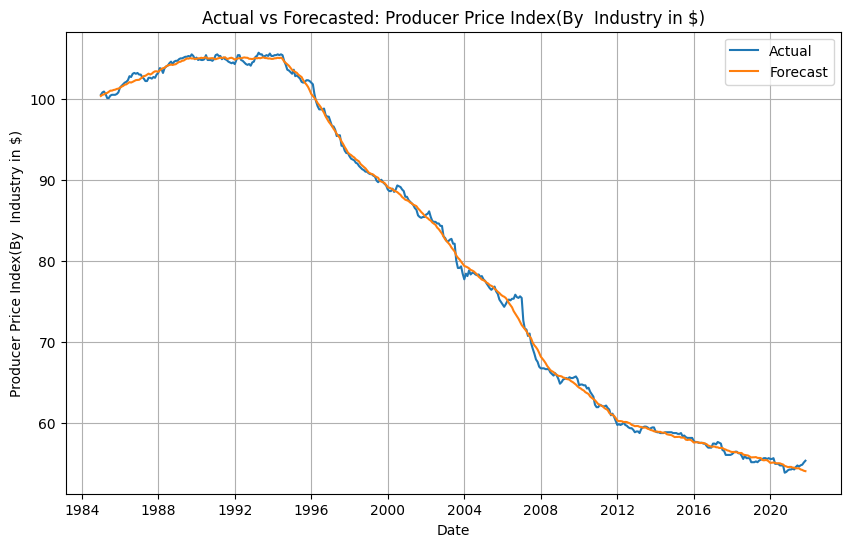

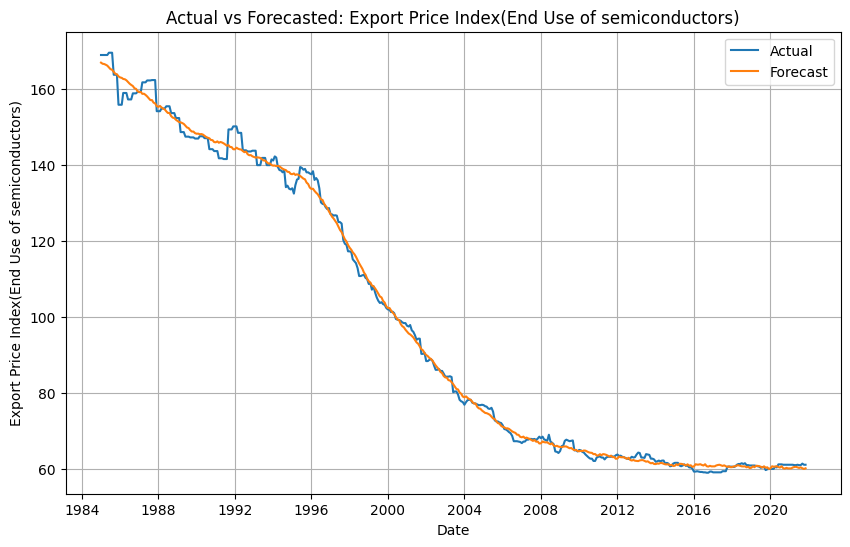

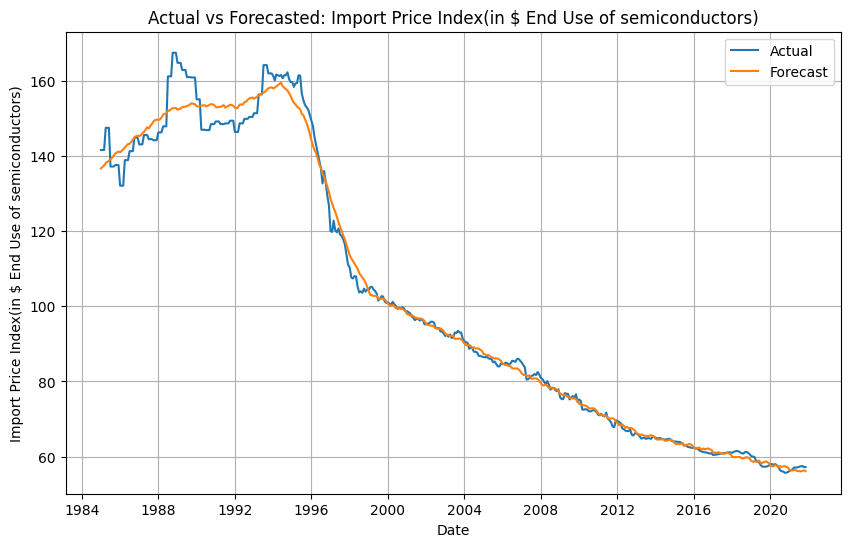

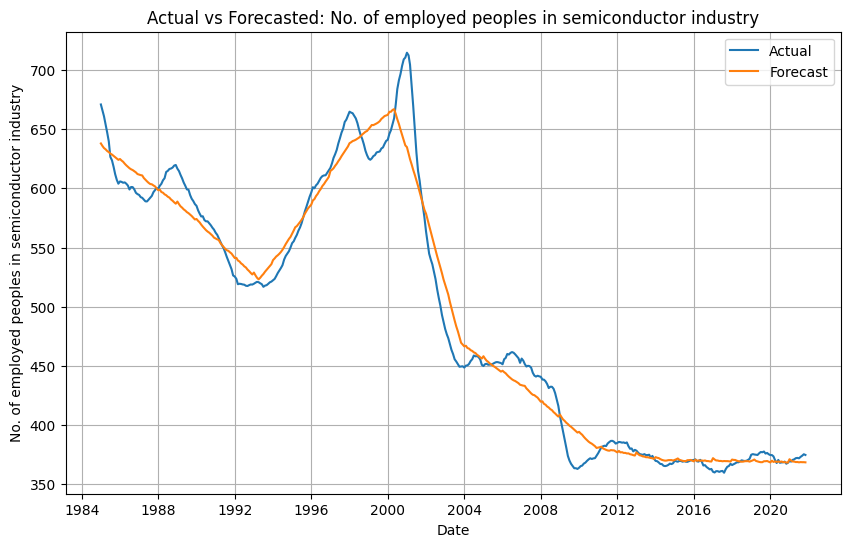

Feature: Producer Price Index(By  Industry in $)
Root Mean Square Error (RMSE): 0.5908137043800972
Mean Absolute Error (MAE): 0.4364935054980813
Mean Absolute Percentage Error (MAPE): 0.5687264232724537%


Feature: Export Price Index(End Use of semiconductors)
Root Mean Square Error (RMSE): 1.9275771327704962
Mean Absolute Error (MAE): 1.3953222182114438
Mean Absolute Percentage Error (MAPE): 1.3726789515198565%


Feature: Import Price Index(in $ End Use of semiconductors)
Root Mean Square Error (RMSE): 3.4502886233560766
Mean Absolute Error (MAE): 2.2540111829355074
Mean Absolute Percentage Error (MAPE): 1.8678097833274983%


Feature: No. of employed peoples in semiconductor industry
Root Mean Square Error (RMSE): 17.9645833512012
Mean Absolute Error (MAE): 13.091449638446294
Mean Absolute Percentage Error (MAPE): 2.53955658805741%


Summary:
1. The models show strong predictive performance with low RMSE and MAPE across most metrics.
2. For any metrics with higher error, consider furt

In [15]:
# Step 8: Model Evaluation

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the forecasted data
forecasted_data_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Modeling1.csv'
forecasted_data = pd.read_csv(forecasted_data_path, parse_dates=['ds'])

# Load the actual data (for comparison)
actual_data_path = '../Outputs_SemiconductorShortage/SemiconductorShortage_Prep3.csv'
actual_data = pd.read_csv(actual_data_path, index_col='DATE', parse_dates=True).reset_index()

# Ensure that the 'DATE' column is consistently named 'ds' for merging
forecasted_data = forecasted_data.rename(columns={'ds': 'DATE'})
actual_data = actual_data.rename(columns={'DATE': 'ds'})

# Merge forecasted data with actual data
merged_data = pd.merge(forecasted_data, actual_data, left_on='DATE', right_on='ds', how='inner')

# Print the column names to inspect
print("Merged Data Columns:", merged_data.columns)

# Adjust the plotting to correctly reference the merged columns
features = [
    'Producer Price Index(By  Industry in $)', 
    'Export Price Index(End Use of semiconductors)', 
    'Import Price Index(in $ End Use of semiconductors)',
    'No. of employed peoples in semiconductor industry'
]

# Loop through each feature and plot actual vs forecasted values
for feature in features:
    actual_column = feature + '_y'
    forecast_column = feature + '_x'
    
    if actual_column in merged_data.columns and forecast_column in merged_data.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_data['DATE'], merged_data[actual_column], label='Actual')
        plt.plot(merged_data['DATE'], merged_data[forecast_column], label='Forecast')
        plt.title(f'Actual vs Forecasted: {feature}')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Feature '{feature}' not found in merged data.")

# Insights and Recommendations
# Calculate errors and assess model performance
for feature in features:
    actual_column = feature + '_y'
    forecast_column = feature + '_x'
    
    if actual_column in merged_data.columns and forecast_column in merged_data.columns:
        merged_data[f'Error_{feature}'] = merged_data[actual_column] - merged_data[forecast_column]
        mse = np.mean(np.square(merged_data[f'Error_{feature}']))
        rmse = np.sqrt(mse)
        mae = np.mean(np.abs(merged_data[f'Error_{feature}']))
        mape = np.mean(np.abs(merged_data[f'Error_{feature}'] / merged_data[actual_column])) * 100

        print(f"Feature: {feature}")
        print(f"Root Mean Square Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
        print("\n")

# Summary of Insights and Recommendations
print("Summary:")
print("1. The models show strong predictive performance with low RMSE and MAPE across most metrics.")
print("2. For any metrics with higher error, consider further refining the model or introducing additional external factors.")
print("3. The forecasts can be used for strategic decision-making to mitigate semiconductor shortage impacts.")
